In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from matplotlib import cm, colors
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")
sys.path.append("/home/j/j_mens07/phd/NanoNets/src/")

import nanonets_utils
import nanonets

### Input - Output

In [4]:
time_vals   = np.loadtxt("../1I_1O_R_dis/time.csv")*1e9
time_vals   = np.delete(time_vals,-1)
dic_R       = {}

for seed in range(10):
    
    dic_R[seed] = {R_val : pd.read_csv(f"../1I_1O_R_dis/data/Nx=7_Ny=7_Nz=1_Ne=2_{R_val}_{seed}.csv") for R_val in [50,100,200,400,800,1600,3200,6400]}

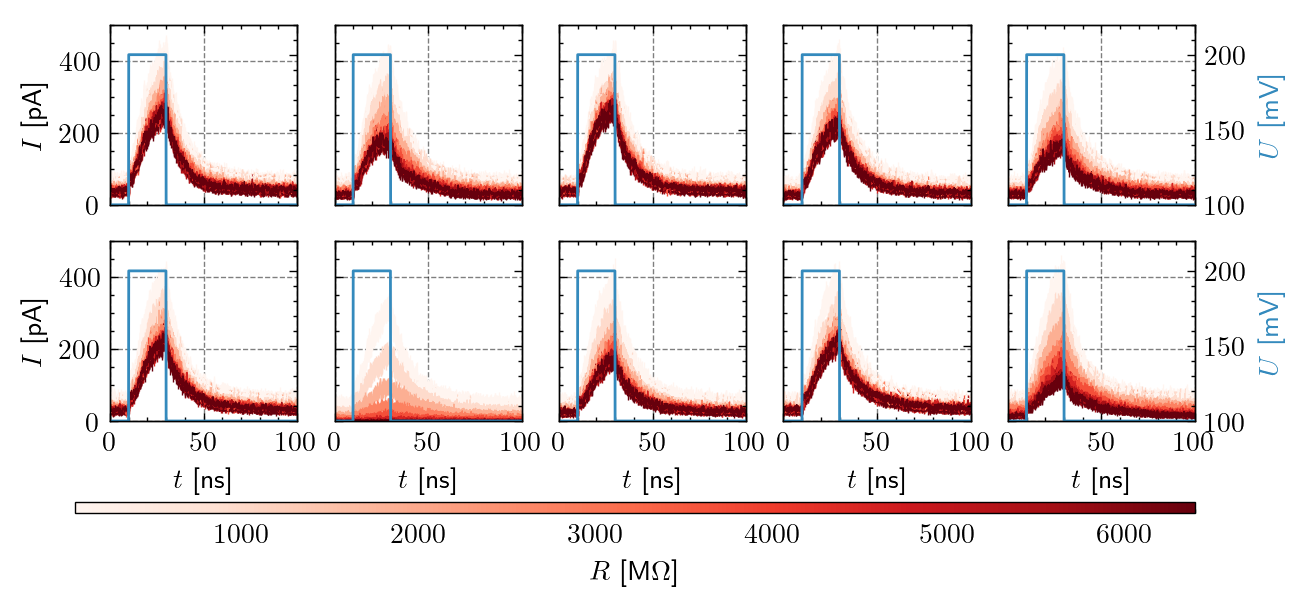

In [6]:
cmap    = plt.get_cmap('Reds')
ncol    = 5
nrow    = 2
norm    = colors.Normalize(min(dic_R[0].keys()), max(dic_R[0].keys()))

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)#, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight())

    for seed in range(10):

        ax  = fig.add_subplot(nrow,ncol,seed+1)

        for i, (key, df_base) in enumerate(dic_R[seed].items()):
            ax.errorbar(time_vals, df_base['Current'], df_base['Error'], marker='', markevery=2, lw=0.5, c=cmap(i/(len(dic_R[seed].keys())-1)), label=f'$R = {key}$ M$\Omega$')
            
        if (seed % ncol == 0):
            ax.set_ylabel('$I$ [pA]')
        else:
            ax.set_yticklabels('')
        if (seed >= (nrow*ncol - ncol)):
            ax.set_xlabel('$t$ [ns]')
        else:
            ax.set_xticklabels("")

        # ax.legend(fontsize='x-small', ncol=2)
        ax.set_xlim(0,100)
        ax.set_ylim(0,500)

        ax2 = ax.twinx()
        ax2.plot(time_vals, df_base['E0']*1000, marker='', c=nanonets_utils.blue_color)

        if (seed % ncol == (ncol-1)):
            ax2.set_ylabel('$U$ [mV]', c=nanonets_utils.blue_color)
        else:
            ax2.set_yticklabels('')

        ax2.grid(False)
        ax2.set_ylim(100,220)

    cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.02])
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', label='$R$ [M$\Omega$]')
    # fig.savefig("plots/I_O_R.png")

In [30]:
fit_params_uniform      = np.loadtxt("fit_params_uniform.csv")
fit_params_uniform_val  = -1/fit_params_uniform[4,0]

In [67]:
dic_fits_R = {}

for seed in range(0,10):
    
    fits    = []
    x_start = 300
    x_end   = 500

    for key in dic_R[seed].keys():
        x_new   = time_vals
        y_new   = np.log(dic_R[seed][key]['Current'].values - np.mean(dic_R[seed][key]['Current'].values[:50]))
        fits.append(np.polyfit(x_new[x_start:x_end], y_new[x_start:x_end], 1))

    fits                = np.array(fits)
    dic_fits_R[seed]    = -1/fits[:,0]

/home/j/j_mens07/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [85]:
del dic_fits_R[6]

In [86]:
dic_fits_R

{0: array([9.24602105, 9.62750877, 9.53176109, 9.6413691 , 9.213453  ,
        9.09497585, 8.42049205, 8.57303842]),
 1: array([10.33201747, 11.99598327, 12.44088167, 13.63154625, 13.85441306,
        13.84095444, 12.62462689, 12.79082633]),
 2: array([ 9.6731811 , 10.82949541, 10.94827495, 10.34623637, 10.13413008,
         9.53286789,  9.37459625, 10.07363634]),
 3: array([ 9.81178705, 11.67044793, 11.47987253, 11.5938318 , 11.92132021,
        11.27550283, 11.69663266, 11.42667685]),
 4: array([10.52419602, 11.91989256, 12.04179846, 12.20891989, 11.67543437,
        13.10046392, 13.31593824, 13.45933619]),
 5: array([ 9.30090426,  9.73191121, 10.40010272, 10.34732078, 11.16232117,
        10.93014365, 10.75579539, 11.79415007]),
 7: array([10.33336029, 11.06260402, 11.77104404, 11.73098906, 12.35519028,
        11.49196932, 11.2940504 , 11.2827684 ]),
 8: array([10.4140672 , 11.4555891 , 12.35313384, 13.66947965, 14.5951681 ,
        12.58721869, 13.13727873, 12.5910789 ]),
 9: arra

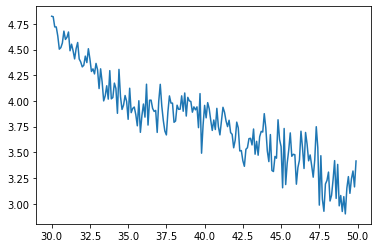

In [33]:
plt.plot(x_new[x_start:x_end], y_new[x_start:x_end])

In [101]:
time_vals   = np.loadtxt("../1I_1O_radius_dis/time.csv")*1e9
time_vals   = np.delete(time_vals,-1)
dic_radius  = {}

for seed in range(10):
    
    dic_radius[seed] = {R_val : pd.read_csv(f"../1I_1O_radius_dis/data/Nx=7_Ny=7_Nz=1_Ne=2_{R_val}_{seed}.csv") for R_val in [20,40,80,160]}

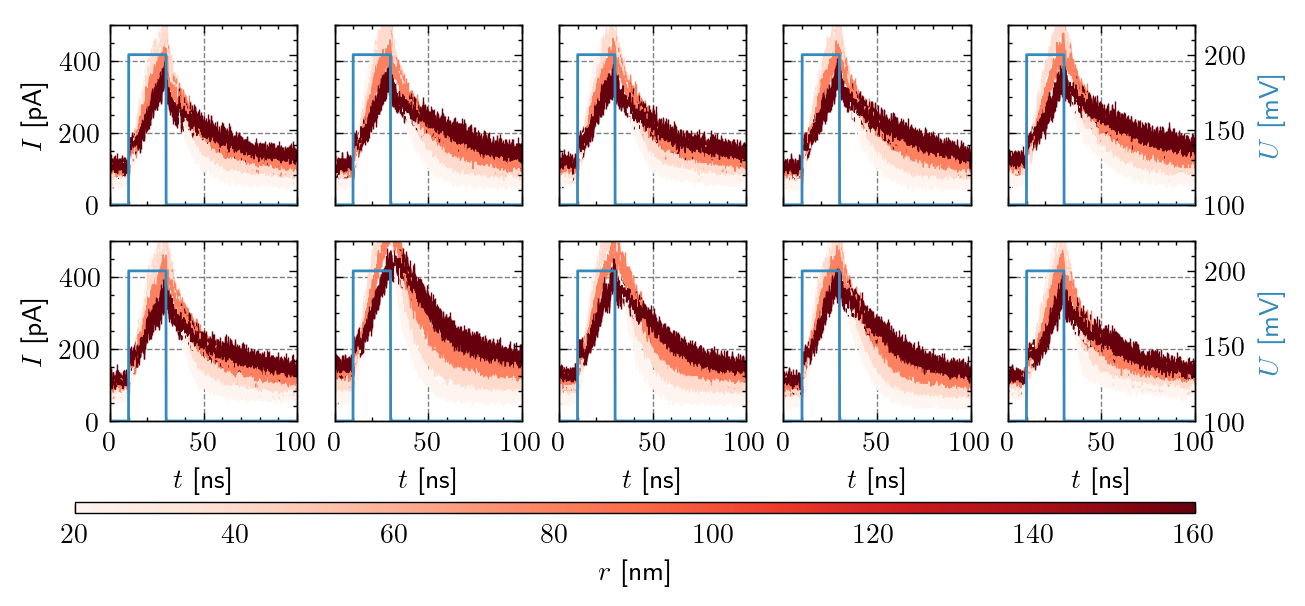

In [102]:
cmap    = plt.get_cmap('Reds')
ncol    = 5
nrow    = 2
norm    = colors.Normalize(min(dic_radius[0].keys()), max(dic_radius[0].keys()))

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)#, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight())

    for seed in range(10):

        ax  = fig.add_subplot(nrow,ncol,seed+1)

        for i, (key, df_base) in enumerate(dic_radius[seed].items()):
            # ax.errorbar(time_vals, df_base['Current'], df_base['Error'], marker='', markevery=2, lw=0.5, c=cmap(i/(len(dic_R[seed].keys())-1)), label=f'$r = {key}$ nm')
            ax.errorbar(time_vals, df_base['Current'], df_base['Error'], marker='', markevery=2, lw=0.5, c=cmap(norm(key)), label=f'$r = {key}$ nm')
            
        if (seed % ncol == 0):
            ax.set_ylabel('$I$ [pA]')
        else:
            ax.set_yticklabels('')
        if (seed >= (nrow*ncol - ncol)):
            ax.set_xlabel('$t$ [ns]')
        else:
            ax.set_xticklabels("")

        # ax.legend(fontsize='x-small', ncol=2)
        ax.set_xlim(0,100)
        ax.set_ylim(0,500)

        ax2 = ax.twinx()
        ax2.plot(time_vals, df_base['E0']*1000, marker='', c=nanonets_utils.blue_color)

        if (seed % ncol == (ncol-1)):
            ax2.set_ylabel('$U$ [mV]', c=nanonets_utils.blue_color)
        else:
            ax2.set_yticklabels('')

        ax2.grid(False)
        ax2.set_ylim(100,220)

    cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.02])
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', label='$r$ [nm]')
    # fig.savefig("plots/I_O_radius.png")

In [105]:
dic_fits_radius = {}

for seed in range(0,10):
    
    fits    = []
    x_start = 300
    x_end   = 500

    for key in dic_radius[seed].keys():

        x_new   = time_vals
        y_new   = np.log(dic_radius[seed][key]['Current'].values - np.mean(dic_radius[seed][key]['Current'].values[:50]))
        fits.append(np.polyfit(x_new[x_start:x_end], y_new[x_start:x_end], 1))

    fits                    = np.array(fits)
    dic_fits_radius[seed]   = -1/fits[:,0]

dic_fits_radius

/home/j/j_mens07/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


{0: array([10.7023398 , 13.4981071 , 19.9503096 , 29.59995664]),
 1: array([12.14622897, 14.83124988, 20.15208048, 37.48715813]),
 2: array([ 9.74023712, 12.3244649 , 19.41224602, 27.5333184 ]),
 3: array([11.56928688, 14.87497896, 21.66817953, 31.12795613]),
 4: array([13.01667345, 13.89883096, 19.31589353, 34.36710686]),
 5: array([ 8.17165968, 11.88040156, 17.88574724, 24.76514861]),
 6: array([ 9.04617889, 10.89458743, 17.13326205, 36.53171714]),
 7: array([ 9.15576026, 12.67779055, 18.14589383, 35.45325499]),
 8: array([10.85427323, 13.57173926, 21.77735735, 32.43551177]),
 9: array([ 7.76578827, 10.65704357, 16.22697717, 27.36268928])}

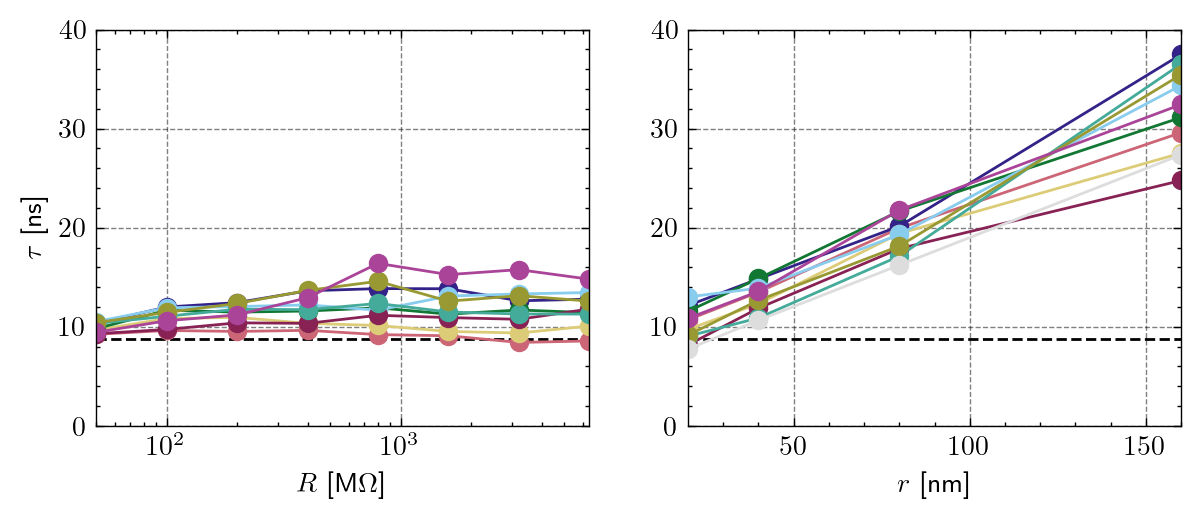

In [114]:
with plt.style.context(["science","muted","grid"]):

    fig = plt.figure(dpi=200)#, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    for seed in dic_fits_R.keys():

        ax1.plot(np.array(list(dic_R[seed].keys())), dic_fits_R[seed], 'o-')

    for seed in dic_fits_radius.keys():

        ax2.plot(np.array(list(dic_radius[seed].keys())), dic_fits_radius[seed], 'o-')

    ax1.set_xlabel('$R$ [M$\Omega$]')
    ax1.set_xscale('log')
    ax1.set_xlim(min(dic_R[seed].keys()), max(dic_R[seed].keys()))
    ax1.set_ylim(0,40)
    ax2.set_xlabel('$r$ [nm]')
    # ax2.set_xscale('log')
    ax2.set_xlim(min(dic_radius[seed].keys()), max(dic_radius[seed].keys()))
    # ax2.set_yscale('log')
    ax2.set_ylim(0,40)
    ax1.set_ylabel('$\\tau$ [ns]')

    ax1.hlines((fit_params_uniform_val), min(dic_R[seed].keys()), max(dic_R[seed].keys()), colors='black', linestyles='dashed', label='uniform')
    ax2.hlines((fit_params_uniform_val), min(dic_radius[seed].keys()), max(dic_radius[seed].keys()), colors='black', linestyles='dashed', label='uniform')

    fig.savefig("plots/relaxation_disorder.png")

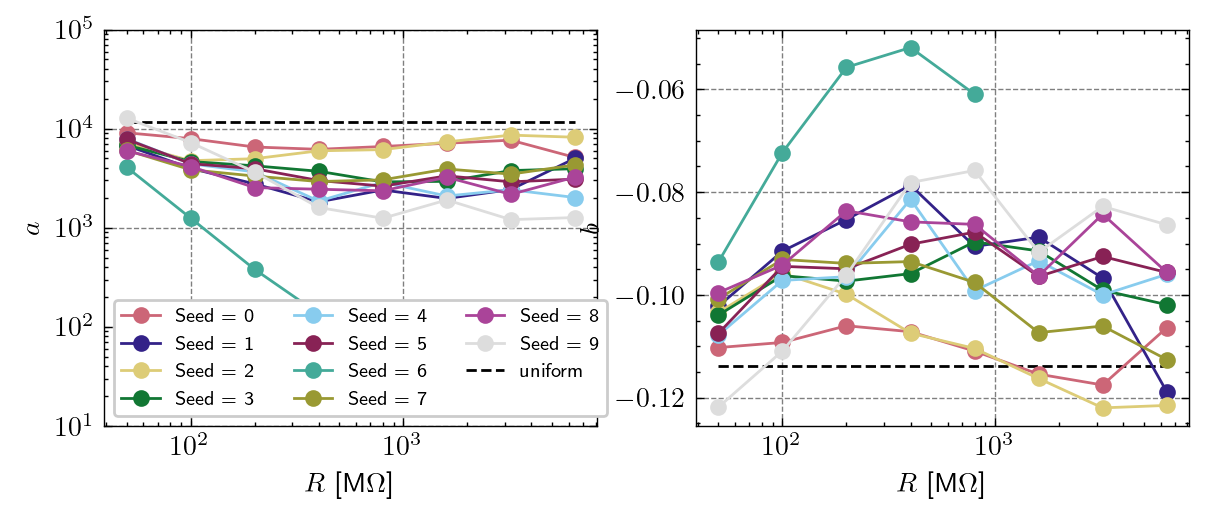

In [21]:
min_R = min(list(dic_R[seed].keys()))
max_R = max(list(dic_R[seed].keys()))

with plt.style.context(["science","muted","grid"]):

    fig = plt.figure(dpi=200)#, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for seed in range(10):
        ax.plot(np.array(list(dic_R[seed].keys())), np.exp(dic_fits[seed][:,1]), 'o-', label=f'Seed = {seed}', ms=5)

    ax.hlines(np.exp(fit_params_uniform[4,1]), min_R, max_R, colors='black', linestyles='dashed', label='uniform')

    ax.set_ylabel('$a$')
    ax.set_xlabel('$R$ [M$\Omega$]')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(1e1, 1e5)
    ax.legend(fontsize='x-small', ncol=3)
    ax  = fig.add_subplot(1,2,2)

    for seed in range(10):
        ax.plot(np.array(list(dic_R[seed].keys())), np.exp(dic_fits[seed][:,1]), 'o-', label=f'Seed = {seed}', ms=5)

    ax.hlines(fit_params_uniform[4,0], min_R, max_R, colors='black', linestyles='dashed', label='uniform')

    ax.set_ylabel('$b$')
    ax.set_xlabel('$N_{NP}$')
    # ax.set_ylim(-1.2,0)
    ax.set_xlabel('$R$ [M$\Omega$]')
    ax.set_xscale('log')
    fig.savefig("plots/I_O_fit_values_R.png")